In [203]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import glob
import skimage
from skimage.color import rgb2hsv

In [204]:
#zip olarak yüklenen resimleri çıkartıyor.
from zipfile import ZipFile
file_name = 'HWData.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#Train image read
accordion = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
train = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/accordion/*.jpg")])
airplanes = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/airplanes/*.jpg")])
train = np.hstack((train,airplanes))
BACKGROUND_Google = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/BACKGROUND_Google/*.jpg")])
train = np.hstack((train,BACKGROUND_Google))
anchor = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/anchor/*.jpg")])
train = np.hstack((train,anchor))
ant = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/ant/*.jpg")])
train = np.hstack((train,ant))
barrel = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/barrel/*.jpg")])
train = np.hstack((train,barrel))
bass = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/bass/*.jpg")])
train = np.hstack((train,bass))
beaver = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/beaver/*.jpg")])
train = np.hstack((train,beaver))
binocular = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/binocular/*.jpg")])
train = np.hstack((train,binocular))
bonsai = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/bonsai/*.jpg")])
train = np.hstack((train,bonsai))
brain = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/brain/*.jpg")])
train = np.hstack((train,brain))
brontosaurus = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/brontosaurus/*.jpg")])
train = np.hstack((train,brontosaurus))
buddha = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/buddha/*.jpg")])
train = np.hstack((train,buddha))
butterfly = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/butterfly/*.jpg")])
train = np.hstack((train,butterfly))
camera = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/train/camera/*.jpg")])
train = np.hstack((train,camera))

#resize 128x128

d = (128, 128)


for i in range(len(train)):
  train[i] = cv2.cvtColor(train[i], cv2.COLOR_BGR2GRAY) # Convert it to grayscale
  resized = cv2.resize(train[i], d, interpolation = cv2.INTER_AREA)
  train[i] = resized



In [ ]:
#Test image read
#barrel ve buddha klasörünü yüklerken error veriyo ondan onları almadım.
accordion2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/accordion/*.jpg")])
test = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/accordion/*.jpg")])
airplanes2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/airplanes/*.jpg")])
test = np.hstack((test,airplanes2))
BACKGROUND_Google2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/BACKGROUND_Google/*.jpg")])
test = np.hstack((test,BACKGROUND_Google2))
anchor2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/anchor/*.jpg")])
test = np.hstack((test,anchor2))
ant2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/ant/*.jpg")])
test = np.hstack((test,ant2))
bass2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/bass/*.jpg")])
test = np.hstack((test,bass2))
beaver2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/beaver/*.jpg")])
test = np.hstack((test,beaver2))
binocular2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/binocular/*.jpg")])
test = np.hstack((test,binocular2))
bonsai2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/bonsai/*.jpg")])
test = np.hstack((test,bonsai2))
brain2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/brain/*.jpg")])
test = np.hstack((test,brain2))
brontosaurus2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/brontosaurus/*.jpg")])
test = np.hstack((test,brontosaurus2))
butterfly2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/butterfly/*.jpg")])
test = np.hstack((test,butterfly2))
camera2 = np.array([cv2.imread(file) for file in glob.glob("/content/HWData/test/camera/*.jpg")])
test = np.hstack((test,camera2))


#resize 128x128

dim = (128, 128)


for i in range(len(test)):
  test[i] = cv2.cvtColor(test[i], cv2.COLOR_BGR2GRAY) # Convert it to grayscale
  resized = cv2.resize(test[i], dim, interpolation = cv2.INTER_AREA)
  test[i] = resized



In [207]:

# Feature extraction(x_matrisi)
tmp = [[] for y in range(len(train))]

#init 
orb = cv2.ORB_create(fastThreshold=0, edgeThreshold=0)


for i in range(len(train)):
  [queryKeypoints, queryDescriptors] = orb.detectAndCompute(train[i], None)
  queryDescriptors = [item for items in queryDescriptors for item in items]
  queryDescriptors = queryDescriptors[0:2500]
  tmp[i].append(queryDescriptors)

#3d list 2d conversion
x_matris = []

for temp in tmp:
    for elem in temp:
        x_matris.append(elem)



print(len(x_matris))

291


In [233]:
# Feature extraction(tests)
t = [[] for y in range(len(test))]

#init 
o = cv2.ORB_create(fastThreshold=0, edgeThreshold=0)


for i in range(len(test)):
  [key, des] = o.detectAndCompute(test[i], None)
  des = [i for j in des for i in j]
  des = des[0:2500]
  t[i].append(des)

#3d list 2d conversion
tests = []

for tm in t:
    for e in tm:
        tests.append(e)



print(len(tests))

115


In [209]:
#sınıf bilgilerini tutan matris(y_matrisi)

y_matris =['' for y in range(len(train))]


for i in range(len(accordion)):
  y_matris[i] = 'accordion'

index = len(accordion)

for i in range(len(airplanes)):
  y_matris[i + index] = 'airplanes'

index = index + len(airplanes)

for i in range(len(BACKGROUND_Google)):
  y_matris[i + index] = 'BACKGROUND_Google'

index = index + len(BACKGROUND_Google)

for i in range(len(anchor)):
  y_matris[i + index] = 'anchor'

index = index + len(anchor)

for i in range(len(ant)):
  y_matris[i + index] = 'ant'

index = index + len(ant)

for i in range(len(barrel)):
  y_matris[i + index] = 'barrel'

index = index + len(barrel)

for i in range(len(bass)):
  y_matris[i + index] = 'bass'

index = index + len(bass)

for i in range(len(beaver)):
  y_matris[i + index] = 'beaver'

index = index + len(beaver)

for i in range(len(binocular)):
  y_matris[i + index] = 'binocular'

index = index + len(binocular)

for i in range(len(bonsai)):
  y_matris[i + index] = 'bonsai'

index = index + len(bonsai)

for i in range(len(brain)):
  y_matris[i + index] = 'brain'

index = index + len(brain)

for i in range(len(brontosaurus)):
  y_matris[i + index] = 'brontosaurus'

index = index + len(brontosaurus)

for i in range(len(butterfly)):
  y_matris[i + index] = 'butterfly'

index = index + len(butterfly)

for i in range(len(buddha)):
  y_matris[i + index] = 'buddha'

index = index + len(buddha)

for i in range(len(camera)):
  y_matris[i + index] = 'camera'

index = index + len(camera)

print(y_matris)
print(len(y_matris))

['accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'accordion', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BA

In [210]:
#sınıf bilgilerini tutan matris(test_y_matrisi)

test_y_matrisi =['' for y in range(len(test))]


for i in range(len(accordion2)):
  test_y_matrisi[i] = 'accordion'

index = len(accordion2)

for i in range(len(airplanes2)):
  test_y_matrisi[i + index] = 'airplanes'

index = index + len(airplanes2)

for i in range(len(BACKGROUND_Google2)):
  test_y_matrisi[i + index] = 'BACKGROUND_Google'

index = index + len(BACKGROUND_Google2)

for i in range(len(anchor2)):
  test_y_matrisi[i + index] = 'anchor'

index = index + len(anchor2)

for i in range(len(ant2)):
  test_y_matrisi[i + index] = 'ant'

index = index + len(ant2)


for i in range(len(bass2)):
  test_y_matrisi[i + index] = 'bass'

index = index + len(bass2)

for i in range(len(beaver2)):
  test_y_matrisi[i + index] = 'beaver'

index = index + len(beaver2)

for i in range(len(binocular2)):
  test_y_matrisi[i + index] = 'binocular'

index = index + len(binocular2)

for i in range(len(bonsai2)):
  test_y_matrisi[i + index] = 'bonsai'

index = index + len(bonsai2)

for i in range(len(brain2)):
  test_y_matrisi[i + index] = 'brain'

index = index + len(brain2)

for i in range(len(brontosaurus2)):
  test_y_matrisi[i + index] = 'brontosaurus'

index = index + len(brontosaurus2)

for i in range(len(butterfly2)):
  test_y_matrisi[i + index] = 'butterfly'

index = index + len(butterfly2)

for i in range(len(camera2)):
  test_y_matrisi[i + index] = 'camera'

index = index + len(camera2)

print(test_y_matrisi)
print(len(test_y_matrisi))

['accordion', 'accordion', 'accordion', 'accordion', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'airplanes', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', 'BACKGROUND_Google', '

In [240]:
# Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#2500 featuredan en iyi 1250'si seçilir.  
selector = SelectKBest(chi2, k=1250)
selector.fit(x_matris, y_matris)
x_matris = selector.transform(x_matris)


In [241]:
# Feature Selection test

#2500 featuredan en iyi 1250'si seçilir.  
chi2_selector = SelectKBest(chi2, k=1250)
chi2_selector.fit(tests, test_y_matrisi)
tests = chi2_selector.transform(tests)



In [ ]:
#SVM train

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(tests, test_y_matrisi)
for i in range(len(tests)):
  print(clf.predict([tests[i]]))

clf.fit(x_matris, y_matris)
for i in range(len(x_matris)):
  print(clf.predict([x_matris[i]]))


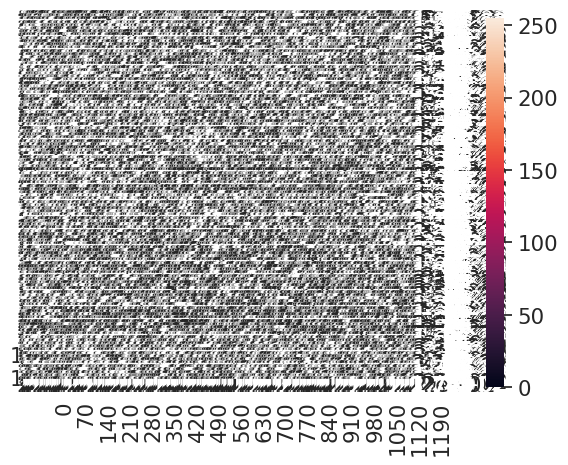

In [254]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(tests, range(115), range(1250))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()
